# RAIL Prior

In [1]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.stats as stats
import qp

import rail.rail_prior as rail_prior

## Load Data

In [2]:
dummy = np.load('../tests/rail_prior/dummy.npz')
zs = dummy['zs']
nzs = dummy['pzs']
dz = np.mean(np.diff(zs))
zs_edges = np.append(zs - dz/2, zs[-1] + dz/2)
q = qp.Ensemble(qp.hist, data={"bins":zs_edges, "pdfs":nzs})

In [3]:
base = rail_prior.PriorBase(q)

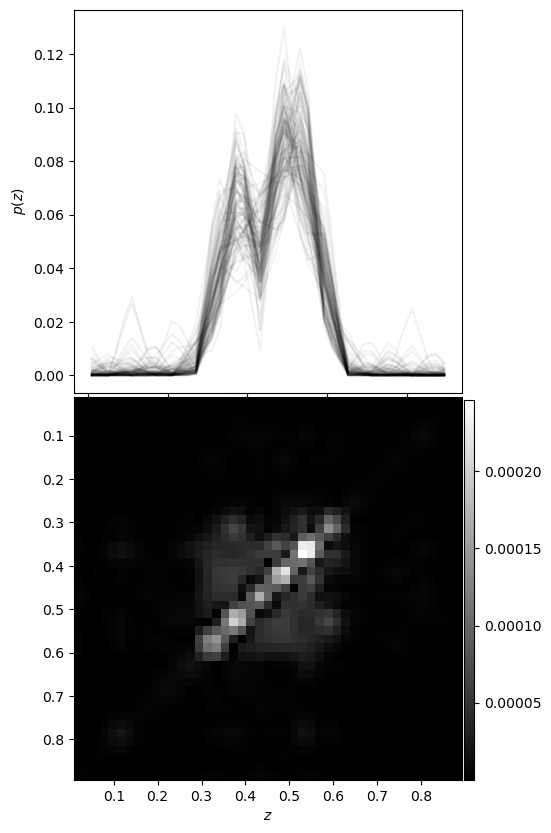

In [4]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    axis[0].plot(base.z, base.nzs[i], 'k-', alpha=0.05)
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(base.nz_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
plt.show()

# Shifts

In [5]:
shifts = rail_prior.PriorShifts(q)

In [6]:
pz_fid = [shifts.z, shifts.nz_mean]

In [7]:
shifted_pzs = np.array([rail_prior.shift_model(pz_fid, shifts.sample_prior()["delta_z"])[1] for i in range(100)])

In [8]:
shifted_cov = np.cov(shifted_pzs.T)

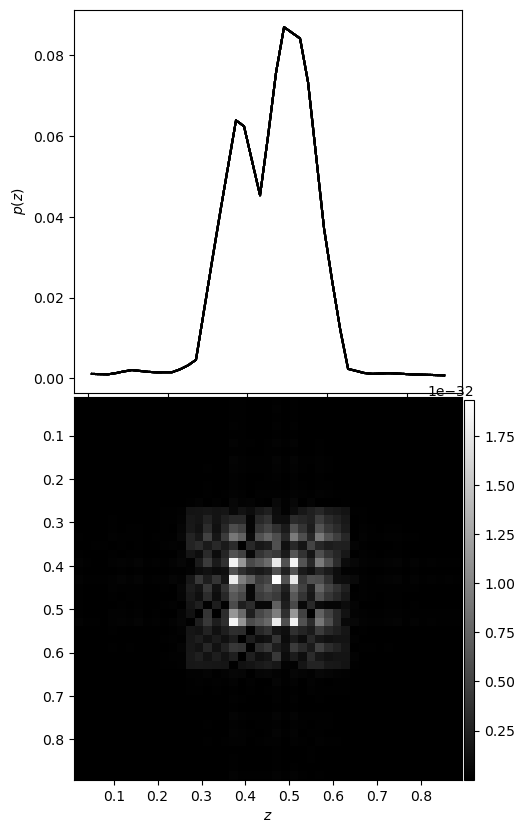

In [9]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    pz = shifted_pzs[i]
    axis[0].plot(shifts.z, pz, 'k-', alpha=0.05)
axis[0].errorbar(shifts.z, shifts.nz_mean, yerr=np.sqrt(np.diag(shifted_cov)), fmt='k-')
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(shifted_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
#plt.savefig('docs/source/assets/shifts.png')
plt.show()

# Shifts & Widths

In [10]:
SnW = rail_prior.PriorShiftsWidths(q)

In [11]:
SnW_pzs = []
for i in range(100):
    prior_sample = SnW.sample_prior()
    shift = prior_sample["delta_z"]
    width = prior_sample["width_z"]
    pz = rail_prior.shift_and_width_model(pz_fid, shift, width)[1]
    SnW_pzs.append(pz)
SnW_pzs = np.array(SnW_pzs)

In [12]:
SnW_cov = np.cov(SnW_pzs.T)

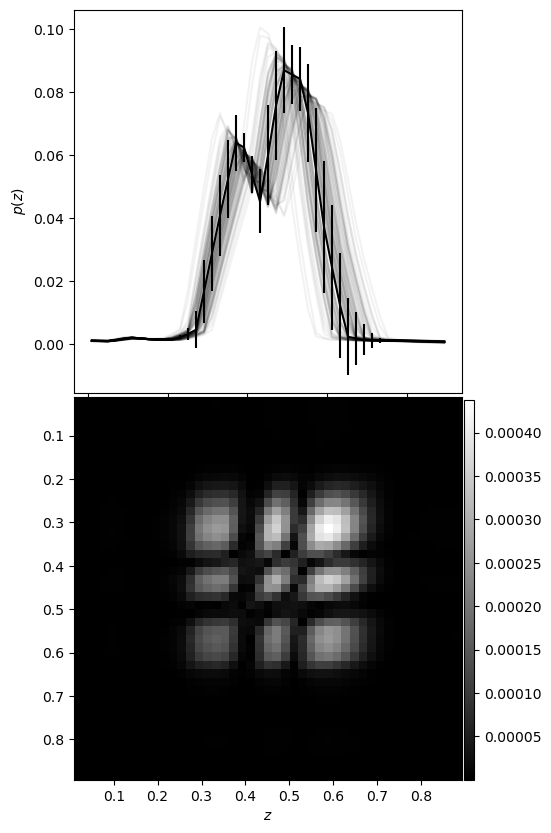

In [13]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    axis[0].plot(SnW.z, SnW_pzs[i], 'k-', alpha=0.05)
axis[0].errorbar(SnW.z, SnW.nz_mean, yerr=np.sqrt(np.diag(SnW_cov)), fmt='k-')
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(SnW_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
#plt.savefig('docs/source/assets/moments.png')
plt.show()

# Moments

In [14]:
moments = rail_prior.PriorMoments(q)

The covariance matrix will be regularized
The covariance matrix will be diagonalized


In [20]:
list(moments.sample_prior().values())

[0.0001467635548816986,
 0.0011411699221024667,
 -0.00233758080477749,
 0.0029325699792972296,
 -1.7189753317243574e-05,
 -0.0008237582846283092,
 0.006518092905823055,
 -0.00013889386275857223,
 -0.0003850259998341816,
 0.0011421153125915967,
 0.005190636788299844,
 0.003958882328152506,
 0.005046193044163223,
 0.002134782117347069,
 0.014383143937515858,
 0.024934564453627094,
 0.05965995494755555,
 0.07025109057047876,
 0.06718260780802467,
 0.043326806170942075,
 0.05537519406912334,
 0.034982142053180044,
 0.06387294863124705,
 0.07885728873287186,
 0.1053528826004863,
 0.08665372286128645,
 0.08220350194832954,
 0.06574683286676794,
 0.0656264184593637,
 0.0470066471601437,
 0.03429013870377108,
 0.019686358439421715,
 -0.0008635218096925876,
 -0.0002901722056292788,
 0.0033101902255218392,
 -9.454109660664636e-05,
 0.000635394422980477,
 0.004190874165424906,
 0.0025373242238900277,
 -0.000656544941185582,
 0.007074858989383229,
 -0.0029080290834346914,
 3.4890025680232124e-05,


In [15]:
moments_pzs = np.array(moments.sample_prior()])[1] for i in range(100)])

TypeError: PriorBase.evaluate_model() missing 1 required positional argument: 'args'

In [ ]:
moments_cov = np.cov(moments_pzs.T)

NameError: name 'moments_pzs' is not defined

NameError: name 'moments_pzs' is not defined

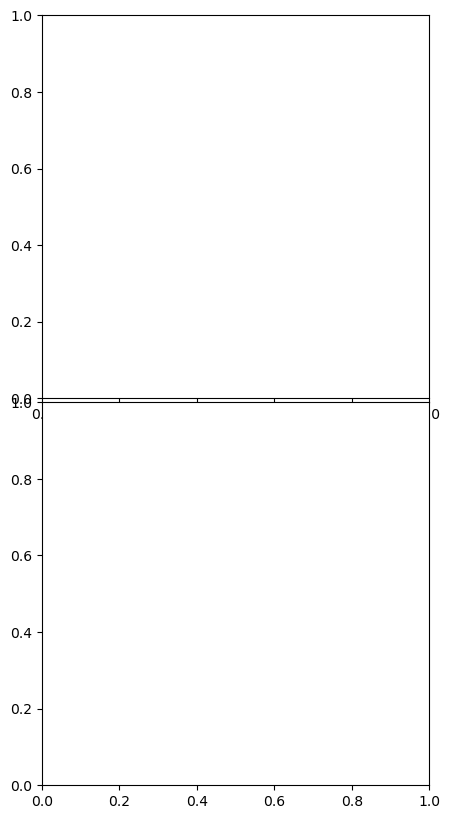

In [ ]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    axis[0].plot(moments.z, moments_pzs[i], 'k-', alpha=0.05)
axis[0].errorbar(moments.z, moments.nz_mean, yerr=np.sqrt(np.diag(moments_cov)), fmt='k-')
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(moments_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
#plt.savefig('docs/source/assets/moments.png')
plt.show()